<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r6-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-1-r6.csv?token=AKVFSOGWII4PQBWODYO56AC63I2IK')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-11-r6.csv?token=AKVFSODRMP7WFOTNGA43XEC63I2IO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-1-r6.csv?token=AKVFSOC3MOPFTWRIVZLY6LS63I2IQ')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-11-r6.csv?token=AKVFSODK22XN2JMTYPDYVR263I2IS')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-1-r6.csv?token=AKVFSOCEJ6B3NQ55JTNCARC63I2IW')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-11-r6.csv?token=AKVFSODSV3TWB37PLTXP5N263I2IY')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-1-r6.csv?token=AKVFSOBUT6AUV234ESMEP7C63I2I2')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-11-r6.csv?token=AKVFSOGWJA7N54BQOK6VAUC63I2I4')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-15-r6.csv?token=AKVFSOB5PQW5BFUJQL6FMNK63I2I6')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-4-r6.csv?token=AKVFSOFMX5VZZ2Q7ETLNRK263I2JC')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-6-r6.csv?token=AKVFSOBWUELYDHYMY6UP3H263I2JG')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-9-r6.csv?token=AKVFSOHVQOHGL5ZIXZ7FYWC63I2JI')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(55271, 26)
(56593, 26)
(64885, 26)
(66246, 26)
(104440, 26)
(105875, 26)
(52513, 26)
(53723, 26)
(37247, 26)
(46610, 26)
(86520, 26)
(34507, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r6-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r6-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,6,6,23,7,2,1,0,0.000000,4,115,1,115,115,0,8,3,27,0
1,7,2,0,1,1,4,3,9,6,6,23,7,3,1,0,0.000000,4,131,1,131,131,0,12,3,27,0
2,7,2,0,1,1,4,3,9,6,6,23,7,2,1,0,0.000000,4,101,1,101,101,0,8,3,27,1
3,15,2,4,1,1,4,3,9,4,4,23,7,2,3,2,0.666667,12,66,1,66,66,8,8,3,27,1
4,15,2,4,1,1,4,3,9,4,4,23,7,2,3,2,0.666667,12,81,1,81,81,8,8,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764425,3276717,2,0,6,4,2,3,10,22,6,23,7,30093,1,0,0.000000,25,5,27,31,135,0,1444464,18,180,0
764426,3276724,2,0,6,5,3,3,10,22,6,23,7,30093,1,0,0.000000,32,4,28,31,112,0,2708370,18,180,0
764427,3276725,2,0,2,1,4,3,11,22,6,23,7,30094,1,0,0.000000,32,3,29,31,87,0,240752,6,66,0
764428,3276726,2,0,7,1,4,3,12,22,6,15,15,30093,3,0,0.000000,6,2,30,31,60,0,842604,21,252,0


In [7]:
df.shape

(764430, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-12-r6.csv?token=AKVFSOGFXPLRBVFF2CSTSU263I2RE')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-7-r6.csv?token=AKVFSOCFZYWDIHTDXDL47DC63I2RG')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-12-r6.csv?token=AKVFSOCCRFXVSA5QWAACUYK63I2RK')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-7-r6.csv?token=AKVFSOCAYF5PLB6ZUSDXOCC63I2RQ')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-12-r6.csv?token=AKVFSOFOPN43UOJJPCWRG5S63I2RS')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-7-r6.csv?token=AKVFSOBKMXLJPAJAY433G4263I2RU')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-12-r6.csv?token=AKVFSOGZOPDPGPZ3CINKWVK63I2RY')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-7-r6.csv?token=AKVFSOH3IVE45S3ZS5CS43S63I2R4')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(53634, 26)
(74541, 26)
(63254, 26)
(84594, 26)
(102690, 26)
(123943, 26)
(50769, 26)
(72102, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,6,6,23,7,3,1,0,0.00,4,131,1,131,131,0,12,3,27,0
1,54,0,2,4,1,1,5,17,23,7,6,6,3,1,1,1.00,8,130,2,131,260,0,12,20,340,0
2,55,0,2,4,2,2,5,17,23,7,6,6,3,1,1,1.00,9,129,3,131,387,0,48,20,340,0
3,56,0,2,4,3,2,5,17,23,7,6,6,3,1,1,1.00,10,128,4,131,512,0,72,20,340,0
4,57,0,2,4,4,2,5,17,23,7,6,6,3,1,1,1.00,11,127,5,131,635,0,96,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104435,3266195,4,2,4,1,1,5,17,23,7,0,0,30088,4,1,0.25,9,5,16,20,80,8,120352,20,340,0
104436,3266196,4,2,4,2,2,5,17,23,7,0,0,30088,4,1,0.25,10,4,17,20,68,8,481408,20,340,0
104437,3266197,4,2,4,3,2,5,17,23,7,0,0,30088,4,1,0.25,11,3,18,20,54,8,722112,20,340,0
104438,3266198,4,2,4,4,2,5,17,23,7,0,0,30088,4,1,0.25,12,2,19,20,38,8,962816,20,340,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.192549,-0.058579,-0.002192,0.003312,0.142601,0.163246,-0.004521,0.247456,-0.493926,-0.689430,-0.276991,-0.060553,-0.016865,-0.056895,-0.050165,0.526332,-0.020444,0.060773,0.134785,-0.009771
inport,-0.192549,1.000000,-0.039766,-0.009658,0.014640,0.088294,-0.000329,-0.021270,0.471152,0.608109,0.500225,0.138762,-0.103641,-0.146014,-0.183473,-0.149219,0.634961,-0.020004,0.034719,0.031688,-0.043331
cache_coherence_type,-0.058579,-0.039766,1.000000,0.268724,-0.407284,-0.221212,-0.247738,0.043264,-0.145490,-0.087850,-0.060552,-0.172053,0.041958,-0.013487,0.020923,0.015270,-0.085065,0.306501,0.662477,0.144089,0.000281
flit_id,-0.002192,-0.009658,0.268724,1.000000,-0.017910,0.202483,0.184744,0.008401,0.041662,0.008967,-0.017470,0.381272,-0.021566,0.031129,0.007028,0.004986,-0.016750,0.646466,0.379214,0.300288,0.000952
flit_type,0.003312,0.014640,-0.407284,-0.017910,1.000000,-0.306900,-0.280013,-0.012743,-0.063151,-0.013587,0.026483,0.378070,-0.039427,0.025793,-0.010020,-0.006492,0.025380,0.123928,-0.574754,-0.455135,-0.001447
vnet,0.142601,0.088294,-0.221212,0.202483,-0.306900,1.000000,0.980389,-0.034905,0.256014,0.069374,0.105519,-0.432091,-0.030304,0.048248,0.013188,0.009539,0.225731,-0.047581,0.583976,0.928159,-0.010208
vc,0.163246,-0.000329,-0.247738,0.184744,-0.280013,0.980389,1.000000,-0.034994,0.196585,-0.023709,0.016252,-0.422134,-0.019183,0.066238,0.034581,0.027357,0.161955,-0.057959,0.546832,0.917045,-0.007714
traversal_id,-0.004521,-0.021270,0.043264,0.008401,-0.012743,-0.034905,-0.034994,1.000000,-0.021852,-0.010949,-0.006066,0.032469,0.062227,0.063179,0.092162,0.036013,-0.014495,0.551761,0.009201,-0.020092,-0.259728
hop_count,0.247456,0.471152,-0.145490,0.041662,-0.063151,0.256014,0.196585,-0.021852,1.000000,0.549985,0.068294,0.060148,-0.166760,-0.147779,-0.231157,-0.191601,0.542360,-0.045528,0.075543,0.177393,-0.007522
current_hop,-0.493926,0.608109,-0.087850,0.008967,-0.013587,0.069374,-0.023709,-0.010949,0.549985,1.000000,0.798520,0.309414,-0.076168,-0.122069,-0.145685,-0.122271,0.159981,-0.027451,-0.019839,-0.008444,-0.012542


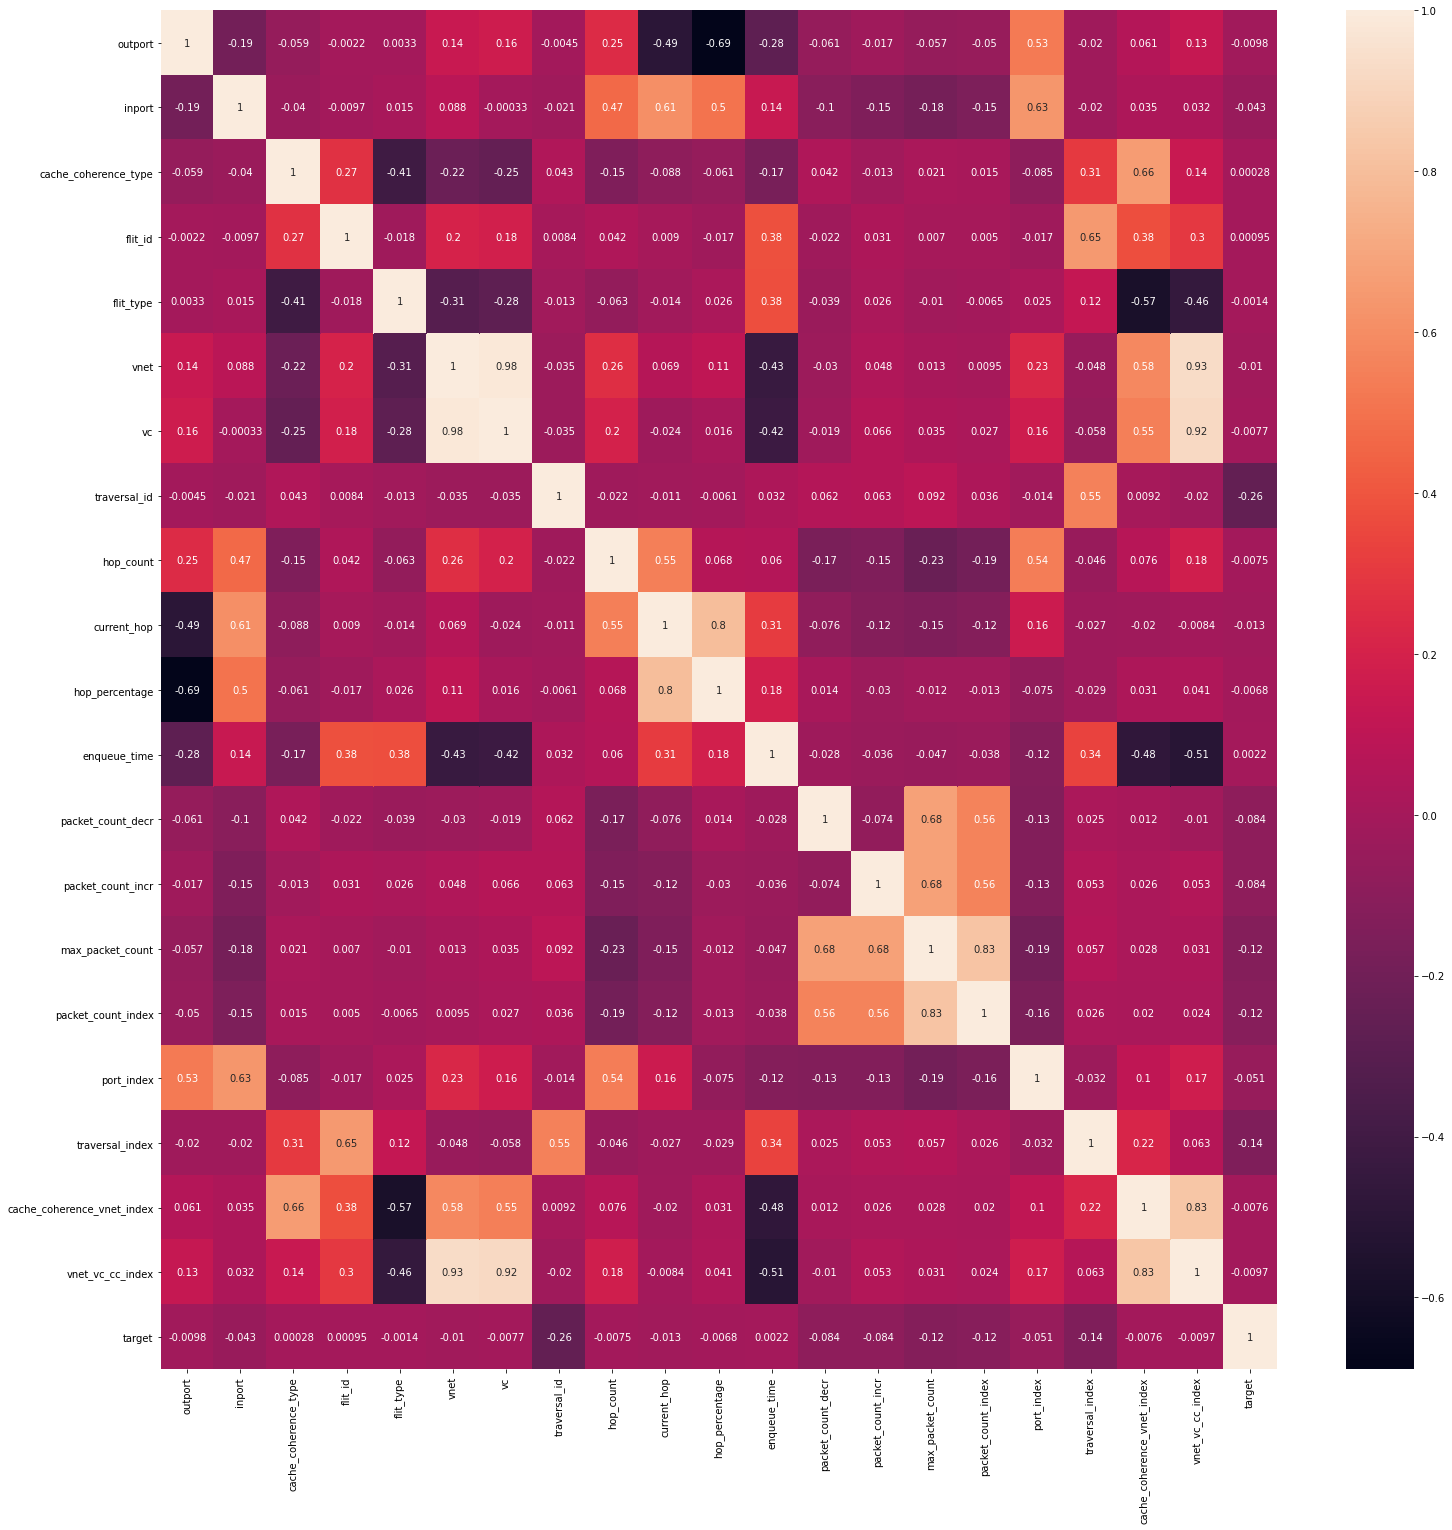

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

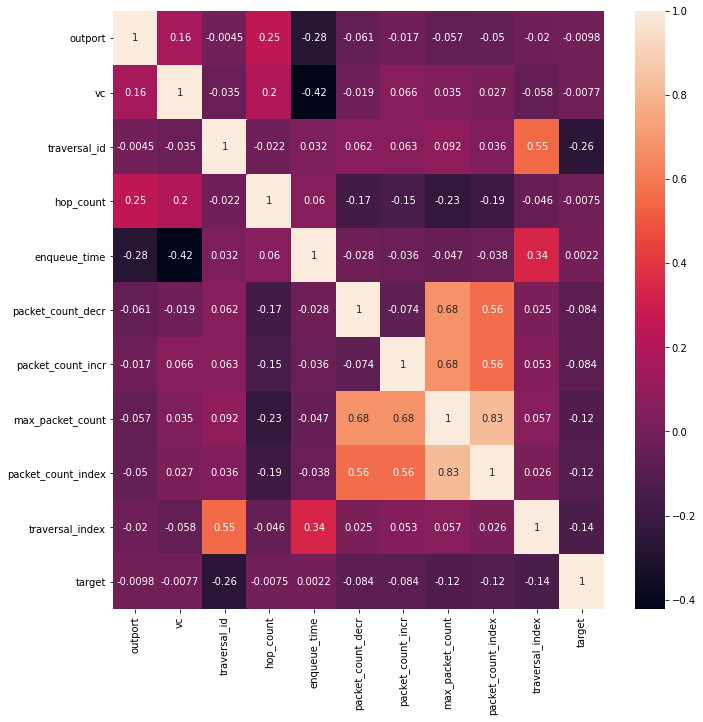

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

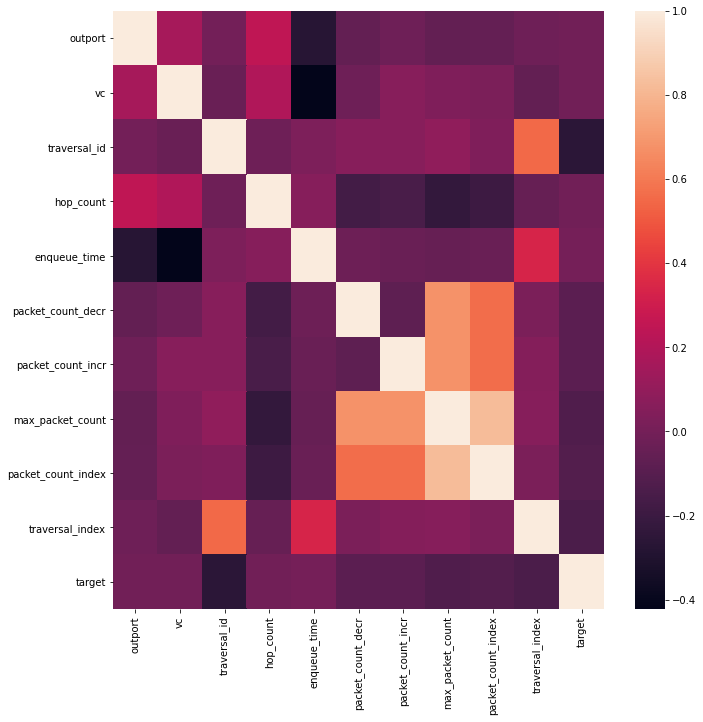

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000000,0.000033,0.2,0.000000,0.550725,0.000000,0.550725,0.010441,0.000001
1,0.5,0.000000,0.000066,0.2,0.000000,0.628019,0.000000,0.628019,0.011906,0.000003
2,0.5,0.000000,0.000033,0.2,0.000000,0.483092,0.000000,0.483092,0.009158,0.000001
3,0.5,0.000000,0.000033,0.6,0.125000,0.314010,0.000000,0.314010,0.005953,0.000001
4,0.5,0.000000,0.000033,0.6,0.125000,0.386473,0.000000,0.386473,0.007327,0.000001
...,...,...,...,...,...,...,...,...,...,...
764425,0.5,0.111111,0.999967,0.2,0.328125,0.019324,0.125604,0.144928,0.012272,0.533333
764426,0.5,0.111111,0.999967,0.2,0.437500,0.014493,0.130435,0.144928,0.010166,1.000000
764427,0.5,0.222222,1.000000,0.2,0.437500,0.009662,0.135266,0.144928,0.007876,0.088890
764428,0.5,0.333333,0.999967,0.6,0.031250,0.004831,0.140097,0.144928,0.005403,0.311110


In [22]:
train_X[train_X.duplicated()].shape

(3329, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.888889,0.000000,0.75,0.060606,0.513699,0.000000,0.513699,0.013699,0.000000
1,1.0,0.888889,0.000000,0.75,0.075758,0.506849,0.006849,0.513699,0.027215,0.000004
2,1.0,0.888889,0.000000,0.75,0.090909,0.500000,0.013699,0.513699,0.040365,0.000007
3,1.0,0.888889,0.000000,0.75,0.106061,0.493151,0.020548,0.513699,0.053151,0.000010
4,1.0,0.888889,0.000000,0.75,0.166667,0.486301,0.027397,0.513699,0.065571,0.000021
...,...,...,...,...,...,...,...,...,...,...
53629,0.5,0.111111,0.999967,0.00,0.318182,0.027397,0.178082,0.205479,0.024475,0.533333
53630,0.5,0.111111,0.999967,0.00,0.424242,0.020548,0.184932,0.205479,0.020274,1.000000
53631,0.5,0.222222,1.000000,0.00,0.424242,0.013699,0.191781,0.205479,0.015708,0.088890
53632,0.5,0.333333,0.999967,0.50,0.015152,0.006849,0.198630,0.205479,0.010776,0.311110


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    559546
1    204884
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  7042.086467
9     traversal_index  2230.235019
7    max_packet_count  1099.297010
8  packet_count_index  1028.413250
5   packet_count_decr   555.395348
6   packet_count_incr   543.929038
1                  vc    16.880106
0             outport    14.648585
3           hop_count     3.652415
4        enqueue_time     0.459084


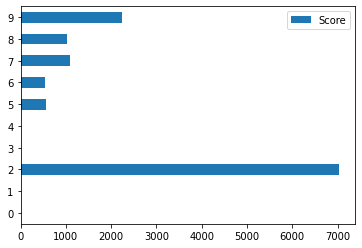

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r6.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.06478683463496
Test Prediction Score 94.20744868725717


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 84.74661595256741
Test Prediction Score 84.73055097194833
Test Prediction Score 87.52489961109178
Test Prediction Score 85.42095184055607
Test Prediction Score 85.72012854221444
Test Prediction Score 87.10294248162461
Test Prediction Score 84.15568555614647
Test Prediction Score 85.66891348367591


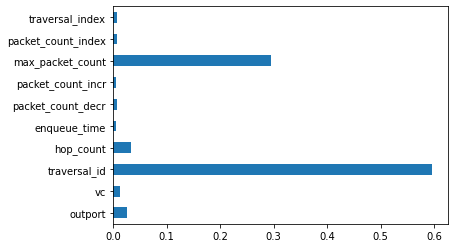

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

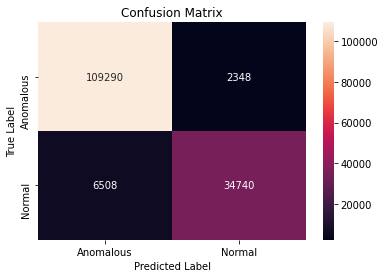

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    111638
           1       0.94      0.84      0.89     41248

    accuracy                           0.94    152886
   macro avg       0.94      0.91      0.92    152886
weighted avg       0.94      0.94      0.94    152886



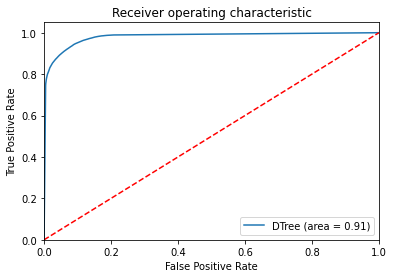

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r6l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.98953468597517
Test Prediction Score 99.48719961278339


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.35876496252376
Test Prediction Score 87.5679156437397
Test Prediction Score 89.78246435008063
Test Prediction Score 88.03579450079202
Test Prediction Score 87.56061933976045
Test Prediction Score 88.90941803893725
Test Prediction Score 87.53373121392976
Test Prediction Score 90.14035671687331


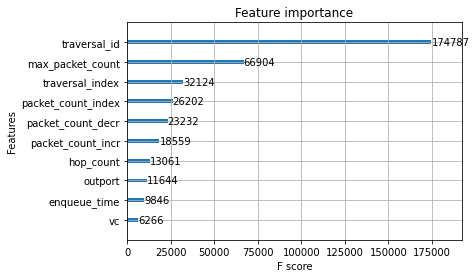

In [52]:
plot_importance(xgbc)
plt.show()

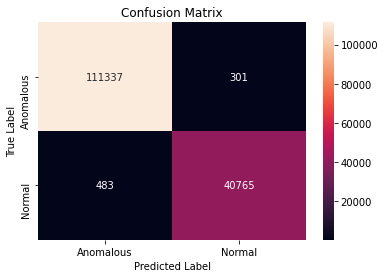

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111638
           1       0.99      0.99      0.99     41248

    accuracy                           0.99    152886
   macro avg       0.99      0.99      0.99    152886
weighted avg       0.99      0.99      0.99    152886



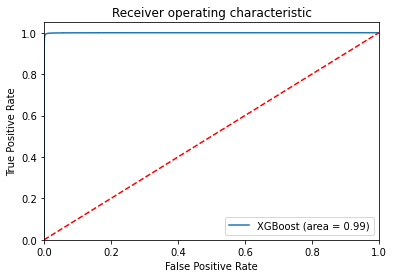

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()